# Exasens Dataset

In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration and Understanding

In [2]:
df = pd.read_csv('dataset/exasens.csv')
df

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN,NaN,NaN,Gender,Somking
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Infected,I176,NaN,NaN,NaN,NaN,0.0,49.0,2.0,NaN,NaN,NaN,NaN
397,Infected,I177,NaN,NaN,NaN,NaN,0.0,37.0,1.0,NaN,NaN,NaN,NaN
398,Infected,I178,NaN,NaN,NaN,NaN,0.0,29.0,1.0,NaN,NaN,NaN,NaN
399,Infected,I179,NaN,NaN,NaN,NaN,1.0,51.0,1.0,NaN,NaN,NaN,NaN


In [3]:
df_exasens = df.copy()

In [4]:
df_exasens = df_exasens.drop([0,1], axis = 0)
df_exasens.drop('ID',1, inplace=True)
df_exasens.head(5)

,Diagnosis,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
2,COPD,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1
3,COPD,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2
4,COPD,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3
5,COPD,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0,NaN,NaN,NaN,NaN
6,COPD,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0,NaN,NaN,NaN,NaN


In [5]:
df_exasens.rename(columns={"Imaginary Part": "Min-Imaginary-Part", "Unnamed: 3": "Avg-Imaginary-Part", "Real Part": "Min-Real-Part", 
                   "Unnamed: 5": "Avg-Real-Part"}, inplace=True)

df_exasens.columns = [x.lower() for x in df_exasens.columns]
df_exasens.head()

,diagnosis,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking,unnamed: 9,unnamed: 10,unnamed: 11,unnamed: 12
2,COPD,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1
3,COPD,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2
4,COPD,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3
5,COPD,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0,NaN,NaN,NaN,NaN
6,COPD,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0,NaN,NaN,NaN,NaN


In [6]:
df_exasens = df_exasens.drop(['unnamed: 9', 'unnamed: 10','unnamed: 11','unnamed: 12'], 1)

df_exasens.reset_index(inplace=True, drop=True)
df_exasens.head()

,diagnosis,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking
0,COPD,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0
1,COPD,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0
2,COPD,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0
3,COPD,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0
4,COPD,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0


### Data Preprocessing

#### Encode Diagnosis Values

In [7]:
enc_diag = {'COPD':0, 'HC':1, 'Asthma':2, 'Infected': 3}

df_exasens['diagnosis'].replace(enc_diag, inplace=True)
df_exasens.head()

,diagnosis,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking
0,0,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0
1,0,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0
2,0,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0
3,0,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0
4,0,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0


#### Convert column type to Float

In [8]:
df_exasens['min-imaginary-part'] = df_exasens['min-imaginary-part'].astype(float)
df_exasens['avg-imaginary-part'] = df_exasens['avg-imaginary-part'].astype(float)
df_exasens['min-real-part'] = df_exasens['min-real-part'].astype(float)
df_exasens['avg-real-part'] = df_exasens['avg-real-part'].astype(float)

In [9]:
df_exasens.dtypes

diagnosis               int64
min-imaginary-part    float64
avg-imaginary-part    float64
min-real-part         float64
avg-real-part         float64
gender                float64
age                   float64
smoking               float64
dtype: object

#### Make values to be absolute

In [10]:
df_exasens['min-imaginary-part'] = df_exasens['min-imaginary-part'].abs()
df_exasens['avg-imaginary-part'] = df_exasens['avg-imaginary-part'].abs()
df_exasens['min-real-part'] = df_exasens['min-real-part'].abs()
df_exasens['avg-real-part'] = df_exasens['avg-real-part'].abs()

In [11]:
df_exasens.head()

,diagnosis,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking
0,0,320.61,300.563531,495.26,464.171991,1.0,77.0,2.0
1,0,325.39,314.750360,473.73,469.263140,0.0,72.0,2.0
2,0,323.00,317.436056,476.12,471.897667,1.0,73.0,3.0
3,0,327.78,317.399670,473.73,468.856388,1.0,76.0,2.0
4,0,325.39,316.155785,478.52,472.869783,0.0,65.0,2.0


### Check Missing Values

In [13]:
df_exasens.isnull().sum()

diagnosis               0
min-imaginary-part    299
avg-imaginary-part    299
min-real-part         299
avg-real-part         299
gender                  0
age                     0
smoking                 0
dtype: int64

Too many missing values, so it would be better to fill those values with mean instead of removing them.

In [14]:
len(df_exasens) - 299

100

#### Fill Missing Values with Mean

In [15]:
df_exasens.mean()

diagnosis               1.403509
min-imaginary-part    314.941800
avg-imaginary-part    304.779677
min-real-part         473.002200
avg-real-part         458.701666
gender                  0.398496
age                    48.736842
smoking                 1.726817
dtype: float64

In [16]:
df_exasens[['min-imaginary-part','avg-imaginary-part','min-real-part','avg-real-part']] = df_exasens[['min-imaginary-part','avg-imaginary-part','min-real-part','avg-real-part']].fillna(df_exasens[['min-imaginary-part','avg-imaginary-part','min-real-part','avg-real-part']].mean())

In [17]:
df_exasens.isnull().sum()

diagnosis             0
min-imaginary-part    0
avg-imaginary-part    0
min-real-part         0
avg-real-part         0
gender                0
age                   0
smoking               0
dtype: int64

### Data Exploration

In [18]:
import seaborn as sns

D:\College\Anaconda\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
df_exasens['diagnosis'].unique()

array([0, 1, 2, 3], dtype=int64)

In [20]:
df_exasens.describe()

,diagnosis,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,1.403509,314.941800,304.779677,473.002200,458.701666,0.398496,48.736842,1.726817
std,1.019946,14.175624,12.884662,24.443262,21.807672,0.490203,18.566962,0.742167
min,0.000000,225.000000,225.000000,44.000000,44.000000,0.000000,17.000000,1.000000
25%,1.000000,314.941800,304.779677,473.002200,458.701666,0.000000,31.000000,1.000000
50%,1.000000,314.941800,304.779677,473.002200,458.701666,0.000000,49.000000,2.000000
75%,2.000000,314.941800,304.779677,473.002200,458.701666,1.000000,64.000000,2.000000
max,3.000000,337.350000,328.280985,626.860000,473.928698,1.000000,93.000000,3.000000


In [21]:
df_exasens.dtypes

diagnosis               int64
min-imaginary-part    float64
avg-imaginary-part    float64
min-real-part         float64
avg-real-part         float64
gender                float64
age                   float64
smoking               float64
dtype: object

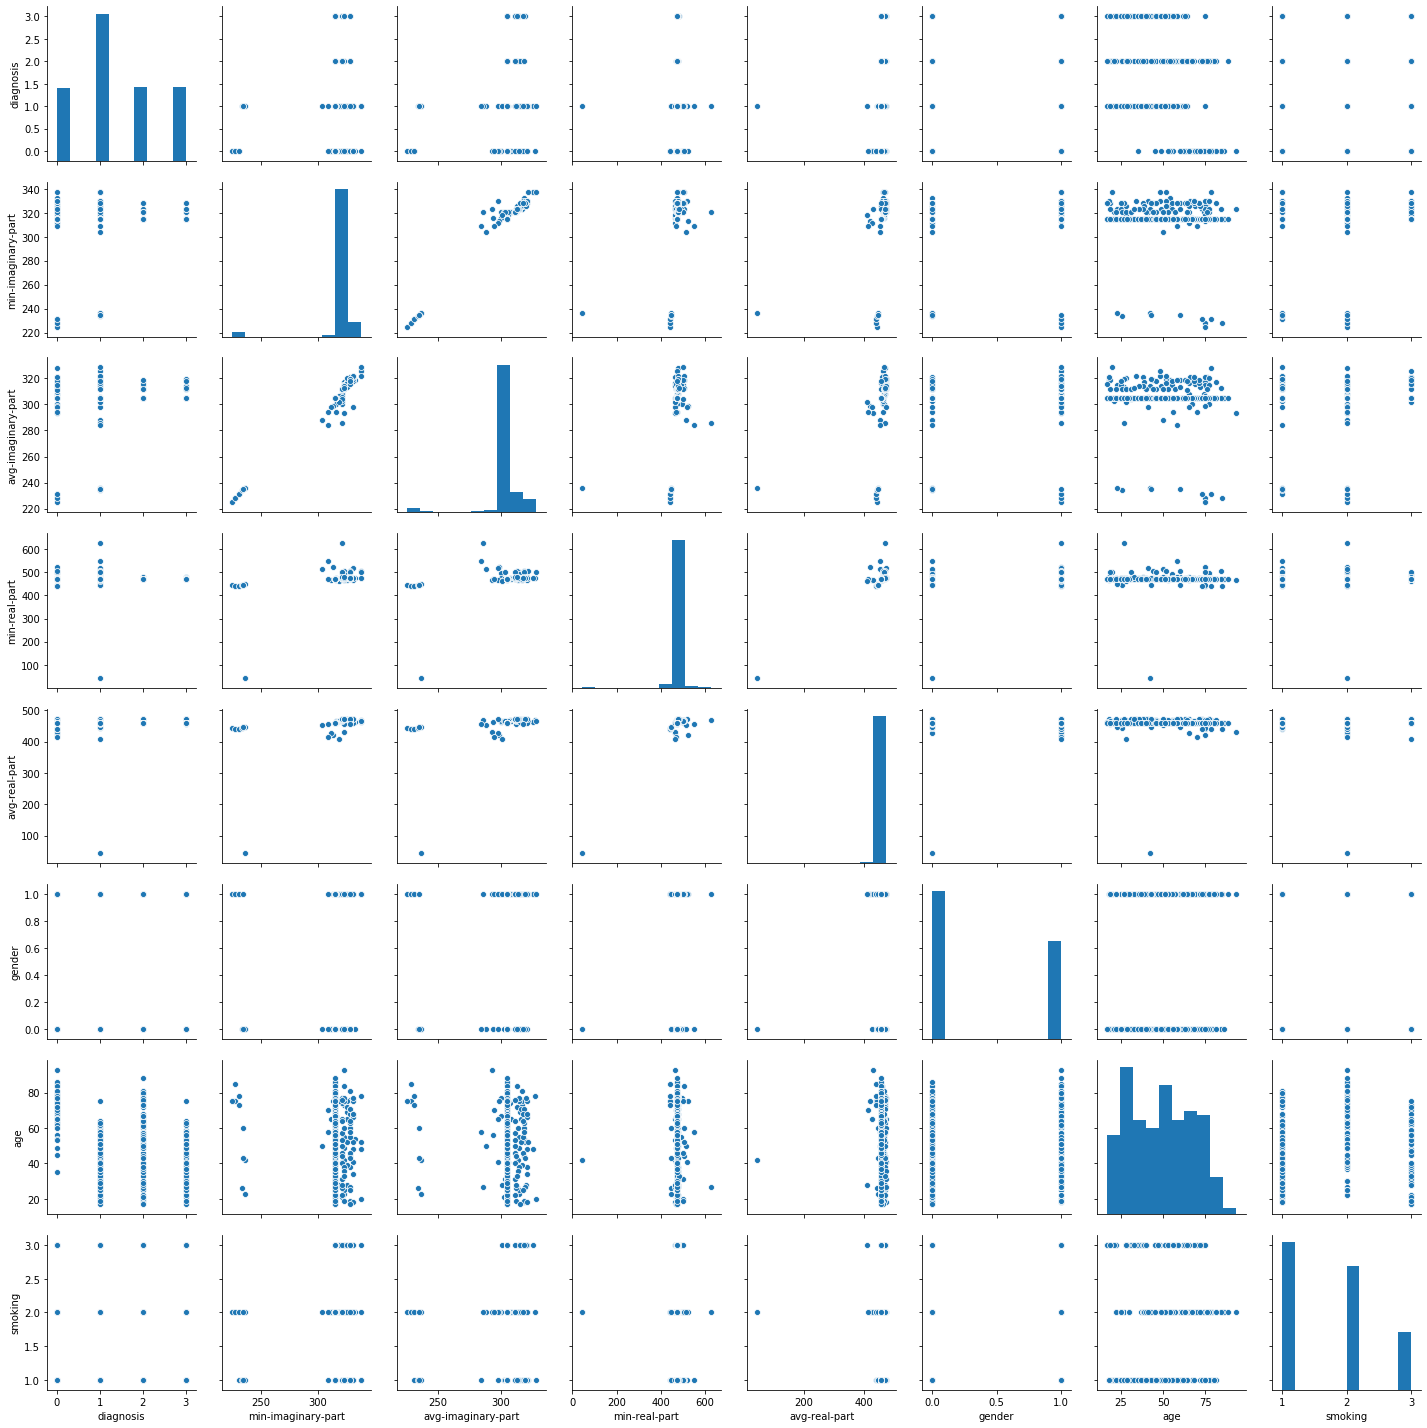

In [22]:
sns.pairplot(data=df_exasens)

## Feature Engineering

### Scale Numerical Features

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
df_exasens.describe()

,diagnosis,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,1.403509,314.941800,304.779677,473.002200,458.701666,0.398496,48.736842,1.726817
std,1.019946,14.175624,12.884662,24.443262,21.807672,0.490203,18.566962,0.742167
min,0.000000,225.000000,225.000000,44.000000,44.000000,0.000000,17.000000,1.000000
25%,1.000000,314.941800,304.779677,473.002200,458.701666,0.000000,31.000000,1.000000
50%,1.000000,314.941800,304.779677,473.002200,458.701666,0.000000,49.000000,2.000000
75%,2.000000,314.941800,304.779677,473.002200,458.701666,1.000000,64.000000,2.000000
max,3.000000,337.350000,328.280985,626.860000,473.928698,1.000000,93.000000,3.000000


In [25]:
scaler = StandardScaler()
num_cols = ['gender','age', 'smoking']
df_exasens[num_cols] = scaler.fit_transform(df_exasens[num_cols])

df_exasens.head()

,diagnosis,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking
0,0,320.61,300.563531,495.26,464.171991,1.228590,1.524140,0.368550
1,0,325.39,314.750360,473.73,469.263140,-0.813941,1.254506,0.368550
2,0,323.00,317.436056,476.12,471.897667,1.228590,1.308433,1.717648
3,0,327.78,317.399670,473.73,468.856388,1.228590,1.470213,0.368550
4,0,325.39,316.155785,478.52,472.869783,-0.813941,0.877019,0.368550


### Check Outliers and Remove them

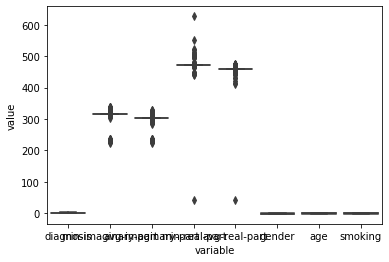

In [26]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_exasens))

In [27]:
df_exasens.describe()

,diagnosis,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking
count,399.000000,399.000000,399.000000,399.000000,399.000000,3.990000e+02,3.990000e+02,3.990000e+02
mean,1.403509,314.941800,304.779677,473.002200,458.701666,-8.584055e-16,-6.900634e-17,9.961400e-17
std,1.019946,14.175624,12.884662,24.443262,21.807672,1.001255e+00,1.001255e+00,1.001255e+00
min,0.000000,225.000000,225.000000,44.000000,44.000000,-8.139410e-01,-1.711464e+00,-9.805470e-01
25%,1.000000,314.941800,304.779677,473.002200,458.701666,-8.139410e-01,-9.564898e-01,-9.805470e-01
50%,1.000000,314.941800,304.779677,473.002200,458.701666,-8.139410e-01,1.419124e-02,3.685504e-01
75%,2.000000,314.941800,304.779677,473.002200,458.701666,1.228590e+00,8.230921e-01,3.685504e-01
max,3.000000,337.350000,328.280985,626.860000,473.928698,1.228590e+00,2.386967e+00,1.717648e+00


In [28]:
Q1 = df_exasens.quantile(0.25)
Q3 = df_exasens.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

diagnosis             1.000000
min-imaginary-part    0.000000
avg-imaginary-part    0.000000
min-real-part         0.000000
avg-real-part         0.000000
gender                2.042531
age                   1.779582
smoking               1.349097
dtype: float64


In [29]:
from scipy import stats
df_exasens = df_exasens[(np.abs(stats.zscore(df_exasens)) < 3).all(axis=1)]

In [30]:
df_exasens.describe()

,diagnosis,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,1.428941,317.089220,306.764610,474.187927,460.093586,-0.011707,-0.011170,0.006002
std,1.021525,4.835284,5.220699,6.426045,6.109039,0.998793,0.993846,1.009319
min,0.000000,303.860000,288.044477,464.160000,410.067071,-0.813941,-1.711464,-0.980547
25%,1.000000,314.941800,304.779677,473.002200,458.701666,-0.813941,-0.956490,-0.980547
50%,1.000000,314.941800,304.779677,473.002200,458.701666,-0.813941,0.014191,0.368550
75%,2.000000,314.941800,304.779677,473.002200,458.701666,1.228590,0.823092,0.368550
max,3.000000,337.350000,328.280985,521.580000,473.928698,1.228590,2.386967,1.717648


Hasil

In [31]:
df_exasens.shape

(387, 8)

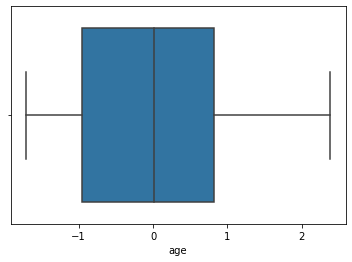

In [32]:
sns.boxplot(df_exasens['age'])

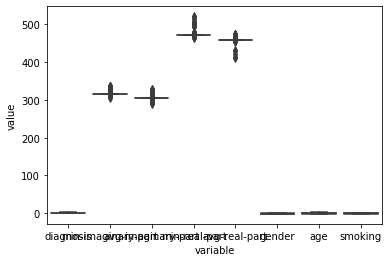

In [33]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_exasens))

### Feature Selection

In [34]:
df_exasens_selected = df_exasens[['min-imaginary-part','avg-imaginary-part','min-real-part','avg-real-part','gender','age', 'smoking']]
df_exasens_selected.head()

,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking
0,320.61,300.563531,495.26,464.171991,1.228590,1.524140,0.368550
1,325.39,314.750360,473.73,469.263140,-0.813941,1.254506,0.368550
2,323.00,317.436056,476.12,471.897667,1.228590,1.308433,1.717648
3,327.78,317.399670,473.73,468.856388,1.228590,1.470213,0.368550
4,325.39,316.155785,478.52,472.869783,-0.813941,0.877019,0.368550


## Agglomerative Hierarchical Clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, cophenet
from scipy.spatial.distance import pdist

In [36]:
df_exasens_selected.columns

Index(['min-imaginary-part', 'avg-imaginary-part', 'min-real-part',
       'avg-real-part', 'gender', 'age', 'smoking'],
      dtype='object')

In [37]:
X = df_exasens_selected

In [38]:
X

,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking
0,320.6100,300.563531,495.2600,464.171991,1.228590,1.524140,0.368550
1,325.3900,314.750360,473.7300,469.263140,-0.813941,1.254506,0.368550
2,323.0000,317.436056,476.1200,471.897667,1.228590,1.308433,1.717648
3,327.7800,317.399670,473.7300,468.856388,1.228590,1.470213,0.368550
4,325.3900,316.155785,478.5200,472.869783,-0.813941,0.877019,0.368550
...,...,...,...,...,...,...,...
394,314.9418,304.779677,473.0022,458.701666,-0.813941,0.014191,0.368550
395,314.9418,304.779677,473.0022,458.701666,-0.813941,-0.632929,-0.980547
396,314.9418,304.779677,473.0022,458.701666,-0.813941,-1.064343,-0.980547
397,314.9418,304.779677,473.0022,458.701666,1.228590,0.122045,-0.980547


### Finding Optimal Number of Cluster

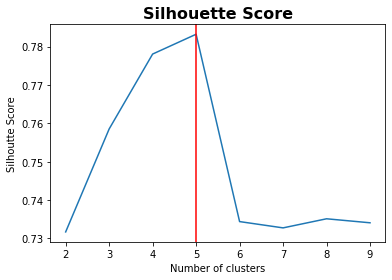

In [41]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

k_range = [i for i in range (2, 10)]
silhouette = []
for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    hc_cluster = hc.fit_predict(X)
    hc_silhouette = metrics.silhouette_score(X, hc_cluster)
    silhouette.append(hc_silhouette)

# Visualize
plt.plot(k_range, silhouette)
plt.title('Silhouette Score', fontsize=16, fontweight='bold')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')

plt.axvline(x=5, color='red')
plt.show()

### Build Model

```N = 5``` as the optimal number of cluster with the Agglomerative Hierarchical algorithm, so let's build our model with 9 clusters.

In [42]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Fit the Hierarchical Clustering Model to the Dataset
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_cluster = hc.fit_predict(X)

# Evaluate model
hc_silhouette = metrics.silhouette_score(X, hc_cluster)

In [43]:
print('Silhouette Score Agglomerative Clustering: {}'.format(hc_silhouette))

Silhouette Score Agglomerative Clustering: 0.7832244355833495


## K-Means Clustering

### Finding Optimal Number of Cluster


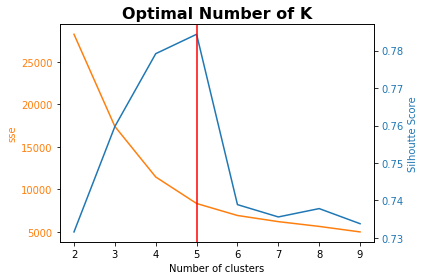

In [49]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Elbow Method
k_range = [i for i in range (2, 10)]
sse = []
silhouette = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=0)
    km_cluster = kmeans.fit_predict(X)
    km_silhouette = metrics.silhouette_score(X, km_cluster)

    sse.append(kmeans.inertia_)
    silhouette.append(km_silhouette)

# Initialize plot
fig, ax1 = plt.subplots()

# Draw sse line
color1 = 'tab:orange'
ax1.set_title('Optimal Number of K', fontsize=16, fontweight='bold')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('sse', color=color1)
ax1.plot(k_range, sse, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

#  instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Draw silhouette score line
color2 = 'tab:blue'
ax2.set_ylabel('Silhoutte Score', color=color2)
ax2.plot(k_range, silhouette, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.axvline(x=5, color='red')
fig.tight_layout()
plt.show()

In [51]:
from sklearn import metrics

# Fit K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=0)
km_cluster = kmeans.fit_predict(X)

# Evaluate model
km_silhouette = metrics.silhouette_score(X, km_cluster)
km_accuracy = metrics.accuracy_score(df_exasens['diagnosis'], km_cluster)
print('Silhouette Score K-Means Clustering: {}'.format(km_silhouette))

Silhouette Score K-Means Clustering: 0.7843708143666003


### Build Model

From the above plot we can see that ```k = 5``` get the best SSE score while also having a pretty good silhouette score so we will use it to build our model.

## Model Comparison

In [54]:
dt = {'Algoritma': ['Agglomerative Clustering', 'K-Means Clustering'], 'Silhouette Score': [hc_silhouette, km_silhouette]}

result = pd.DataFrame(data=dt)
result

,Algoritma,Silhouette Score
0,Agglomerative Clustering,0.783224
1,K-Means Clustering,0.784371


## Visualize: K-Means Clustering
Based on the Model Comparison, K-Means is slightly better than Agglomerative Clustering, about ```{{  np.round((km_silhouette - hc_silhouette), decimals=5) }}```. In this part, we will see the visualization of each data points refer to each clusters using K-Means Clustering

In [55]:
print(set(km_cluster))

{0, 1, 2, 3, 4}


In [56]:
X.columns

Index(['min-imaginary-part', 'avg-imaginary-part', 'min-real-part',
       'avg-real-part', 'gender', 'age', 'smoking'],
      dtype='object')

### 3D Visualization

In [57]:
from mpl_toolkits.mplot3d import Axes3D

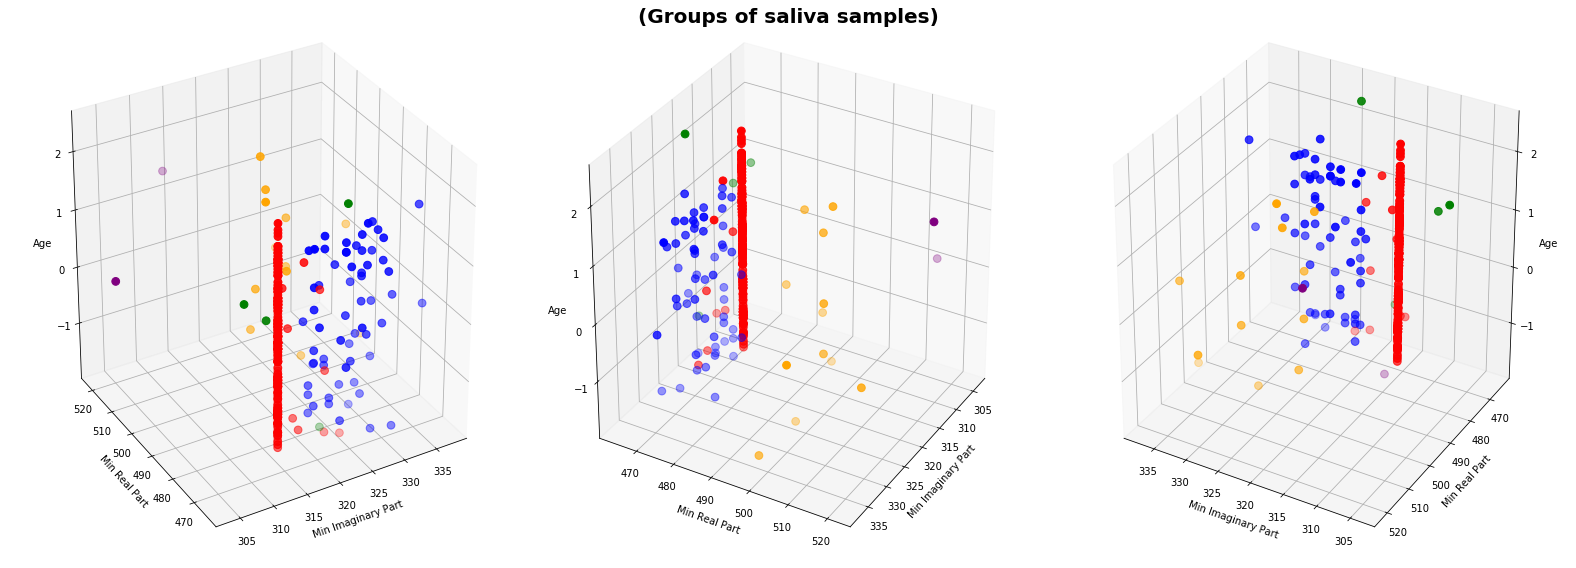

In [58]:
# Insert label into original data
X['cluster'] = km_cluster

# Create figure
fig = plt.figure(figsize=(22,8))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Define colors
colors = ['blue', 'red', 'orange', 'green', 'purple', 'brown', 'pink' , 'gray' , 'olive','cyan','gold']

axes = [ax1, ax2, ax3]
for ax in axes:
    # Iterate thorough each cluster
    for c in set(km_cluster):
        new_X = X[X['cluster']==c]
        ax.scatter(new_X['min-imaginary-part'], new_X['min-real-part'],  new_X['age'],c=colors[c], s=60)
        

ax1.view_init(elev=30, azim=-120)
ax2.view_init(elev=30, azim=30)
ax3.view_init(elev=30, azim=120)

ax1.set_xlabel('Min Imaginary Part')
ax1.set_ylabel('Min Real Part')
ax1.set_zlabel('Age')

ax2.set_xlabel('Min Imaginary Part')
ax2.set_ylabel('Min Real Part')
ax2.set_zlabel('Age')

ax3.set_xlabel('Min Imaginary Part')
ax3.set_ylabel('Min Real Part')
ax3.set_zlabel('Age')

fig.suptitle('(Groups of saliva samples)', fontsize=20, color='k', fontweight='bold')

fig.tight_layout()

### 2D Visualization

In [59]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8

D:\College\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


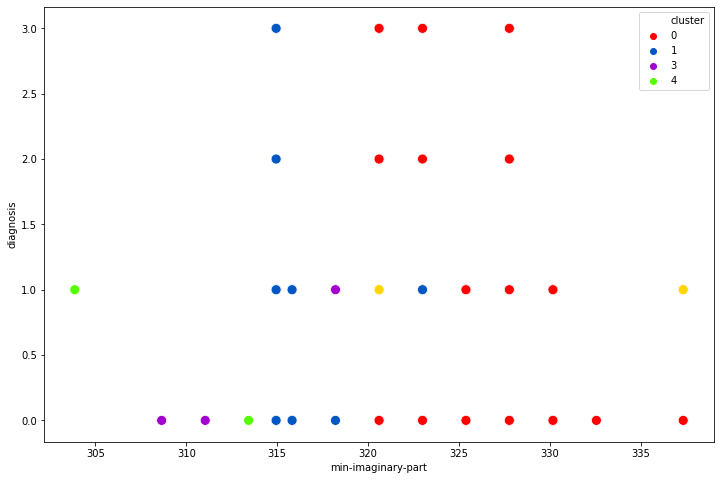

In [60]:
df_exasens['cluster'] = km_cluster
sns.scatterplot(data=df_exasens, x='min-imaginary-part', y='diagnosis', hue='cluster', palette=("prism"), s=100)

## Results: Exasens Dataset

In [62]:
df_exasens

,diagnosis,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking,cluster
0,0,320.6100,300.563531,495.2600,464.171991,1.228590,1.524140,0.368550,2
1,0,325.3900,314.750360,473.7300,469.263140,-0.813941,1.254506,0.368550,0
2,0,323.0000,317.436056,476.1200,471.897667,1.228590,1.308433,1.717648,0
3,0,327.7800,317.399670,473.7300,468.856388,1.228590,1.470213,0.368550,0
4,0,325.3900,316.155785,478.5200,472.869783,-0.813941,0.877019,0.368550,0
...,...,...,...,...,...,...,...,...,...
394,3,314.9418,304.779677,473.0022,458.701666,-0.813941,0.014191,0.368550,1
395,3,314.9418,304.779677,473.0022,458.701666,-0.813941,-0.632929,-0.980547,1
396,3,314.9418,304.779677,473.0022,458.701666,-0.813941,-1.064343,-0.980547,1
397,3,314.9418,304.779677,473.0022,458.701666,1.228590,0.122045,-0.980547,1


# Dishonest Dataset

In [75]:
rcParams['figure.figsize'] = 8,6

## Data Exploration and Understanding

In [64]:
df_dis = pd.read_csv('dataset/dataset1/dishonest.txt', names=['counting_trust', 'counting_untrust', 'last_time', 'transaction_context', 'trust_score'], sep=' ')
df_dis.head()

,counting_trust,counting_untrust,last_time,transaction_context,trust_score
0,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy
1,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy
2,CT_range_1,CU_range_4,LT_range_4,sport,trustworthy
3,CT_range_2,CU_range_1,LT_range_4,sport,trustworthy
4,CT_range_3,CU_range_1,LT_range_4,sport,trustworthy


In [65]:
for col in df_dis.columns:
    print(df_dis[col].unique())

['CT_range_4' 'CT_range_1' 'CT_range_2' 'CT_range_3']
['CU_range_1' 'CU_range_4' 'CU_range_3' 'CU_range_5']
['LT_range_4' 'LT_range_1' 'LT_range_3' 'LT_range_2']
['sport' 'game' 'ECommerce' 'holiday']
['untrustworthy' 'trustworthy']


In [66]:
df_dis.dtypes

counting_trust         object
counting_untrust       object
last_time              object
transaction_context    object
trust_score            object
dtype: object

In [67]:
df_dis[df_dis.columns].apply(lambda col: col.astype('category'))

,counting_trust,counting_untrust,last_time,transaction_context,trust_score
0,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy
1,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy
2,CT_range_1,CU_range_4,LT_range_4,sport,trustworthy
3,CT_range_2,CU_range_1,LT_range_4,sport,trustworthy
4,CT_range_3,CU_range_1,LT_range_4,sport,trustworthy
...,...,...,...,...,...
317,CT_range_2,CU_range_1,LT_range_2,holiday,untrustworthy
318,CT_range_1,CU_range_1,LT_range_1,holiday,trustworthy
319,CT_range_1,CU_range_1,LT_range_1,holiday,trustworthy
320,CT_range_1,CU_range_1,LT_range_1,holiday,trustworthy


### Data Preprocessing

#### Encode Values

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
df_dishonest = df_dis.copy()

In [70]:
le = LabelEncoder()
df_dishonest = df_dishonest[df_dishonest.columns].apply(le.fit_transform)
df_dishonest.head()

,counting_trust,counting_untrust,last_time,transaction_context,trust_score
0,3,0,3,3,1
1,3,0,3,3,1
2,0,2,3,3,0
3,1,0,3,3,0
4,2,0,3,3,0


### Check Missing Values

In [71]:
df_dishonest.isnull().sum()

counting_trust         0
counting_untrust       0
last_time              0
transaction_context    0
trust_score            0
dtype: int64

No missing values

### Data Exploration

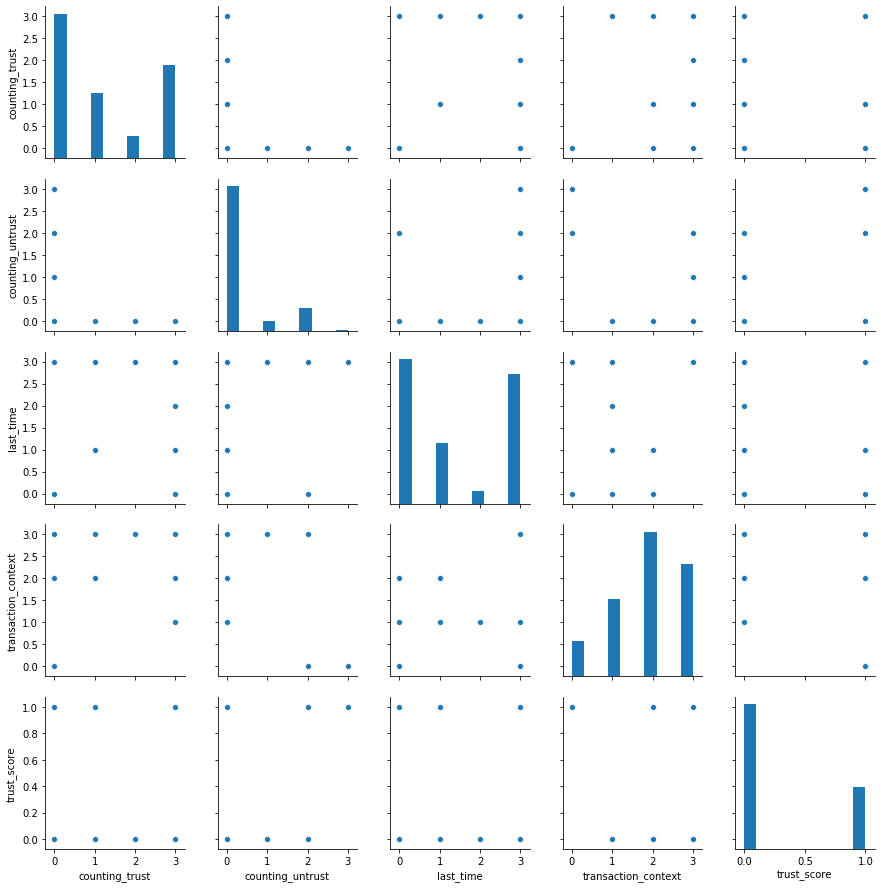

In [72]:
sns.pairplot(data=df_dishonest)

## Feature Engineering

### Scale Numerical Features

In [73]:
# scaler = StandardScaler()
# df_dishonest[df_dishonest.columns] = scaler.fit_transform(df_dishonest[df_dishonest.columns])

# df_dishonest.head()

### Check Outliers

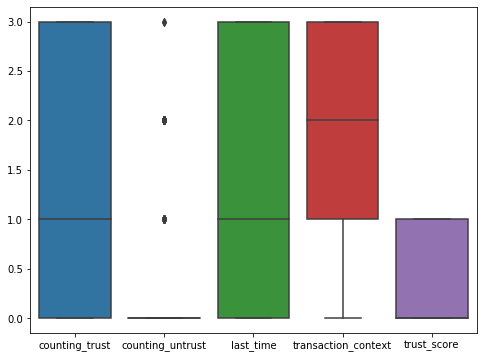

In [76]:
sns.boxplot(data=df_dishonest)

Data looks good and no need to remove outliers

In [77]:
df_dishonest.describe()

,counting_trust,counting_untrust,last_time,transaction_context,trust_score
count,322.000000,322.000000,322.000000,322.000000,322.000000
mean,1.195652,0.335404,1.366460,1.903727,0.301242
std,1.273592,0.722958,1.347384,0.943935,0.459512
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,2.000000,0.000000
75%,3.000000,0.000000,3.000000,3.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000


### Feature Selection

In [78]:
df_dishonest_selected = df_dishonest[['counting_trust','counting_untrust','last_time','transaction_context']]
df_dishonest_selected.head()

,counting_trust,counting_untrust,last_time,transaction_context
0,3,0,3,3
1,3,0,3,3
2,0,2,3,3
3,1,0,3,3
4,2,0,3,3


## Agglomerative Hierarchical Clustering

In [79]:
df_dishonest_selected.columns

Index(['counting_trust', 'counting_untrust', 'last_time',
       'transaction_context'],
      dtype='object')

In [80]:
X_dis = df_dishonest_selected

In [81]:
X_dis

,counting_trust,counting_untrust,last_time,transaction_context
0,3,0,3,3
1,3,0,3,3
2,0,2,3,3
3,1,0,3,3
4,2,0,3,3
...,...,...,...,...
317,1,0,1,2
318,0,0,0,2
319,0,0,0,2
320,0,0,0,2


### Finding Optimal Number of Cluster

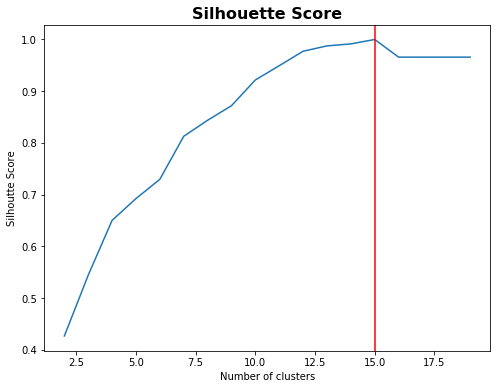

In [84]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

k_range = [i for i in range (2, 20)]
silhouette = []
for k in k_range:
    hc_dis = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    hc_cluster_dis = hc_dis.fit_predict(X_dis)
    hc_silhouette_dis = metrics.silhouette_score(X_dis, hc_cluster_dis)
    silhouette.append(hc_silhouette_dis)

# Visualize
plt.plot(k_range, silhouette)
plt.title('Silhouette Score', fontsize=16, fontweight='bold')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')

plt.axvline(x=15, color='red')
plt.show()

### Build Model

```K = 15``` as the optimal number of cluster with the Agglomerative Hierarchical algorithm, so let's build our model with 9 clusters.

In [85]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Fit the Hierarchical Clustering Model to the Dataset
hc_dis = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')
hc_cluster_dis = hc_dis.fit_predict(X_dis)

# Evaluate model
hc_silhouette_dis = metrics.silhouette_score(X_dis, hc_cluster_dis)

In [86]:
print('Silhouette Score Agglomerative Clustering: {}'.format(hc_silhouette_dis))

Silhouette Score Agglomerative Clustering: 1.0


## K-Means Clustering

### Finding Optimal Number of Cluster


D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (19). Possibly due to duplicate points 

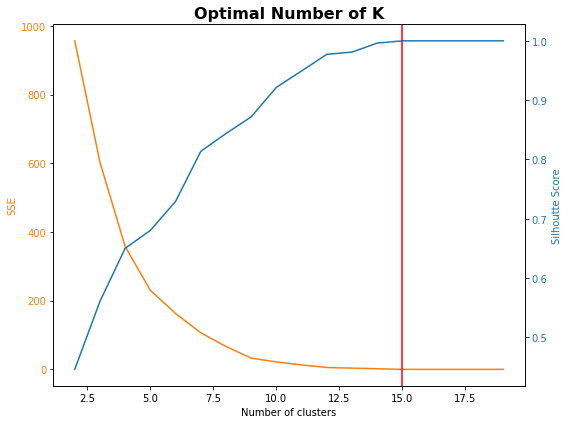

In [88]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Elbow Method
k_range = [i for i in range (2, 20)]
sse = []
silhouette = []
for k in k_range:
    kmeans_dis = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)
    km_cluster_dis = kmeans_dis.fit_predict(X_dis)
    km_silhouette_dis = metrics.silhouette_score(X_dis, km_cluster_dis)

    sse.append(kmeans_dis.inertia_)
    silhouette.append(km_silhouette_dis)

# Initialize plot
fig, ax1 = plt.subplots()

# Draw sse line
color1 = 'tab:orange'
ax1.set_title('Optimal Number of K', fontsize=16, fontweight='bold')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE', color=color1)
ax1.plot(k_range, sse, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

#  instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Draw silhouette score line
color2 = 'tab:blue'
ax2.set_ylabel('Silhoutte Score', color=color2)
ax2.plot(k_range, silhouette, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.axvline(x=15, color='red')

fig.tight_layout()
plt.show()

### Build Model

From the above plot we can see that ```k = 15``` get the best SSE score while also having a pretty good silhouette score so we will use it to build our model.

In [90]:
from sklearn import metrics

# Fit K-Means Model to the Data
kmeans_dis = KMeans(n_clusters=15, init='k-means++', max_iter=500, n_init=10, random_state=0)
km_cluster_dis = kmeans_dis.fit_predict(X_dis)

# Evaluate model
km_silhouette_dis = metrics.silhouette_score(X_dis, km_cluster_dis)
print('Silhouette Score K-Means Clustering: {}'.format(km_silhouette_dis))

Silhouette Score K-Means Clustering: 1.0


## Dishonest: Model Comparison

In [91]:
dt_dis = {'Algoritma': ['Agglomerative Clustering', 'K-Means Clustering'], 'Silhouette Score': [hc_silhouette_dis, km_silhouette_dis]}

result = pd.DataFrame(data=dt_dis)
result

,Algoritma,Silhouette Score
0,Agglomerative Clustering,1.0
1,K-Means Clustering,1.0


All clustering methods return the same Silhouette Score = 1.0. In the previous dataset, we've already visualize using K-Means. This time we will take Agglomerative Clustering to visualize each clusters.

## Visualize: Agglomerative Clustering

### 3D Visualization

In [93]:
X_dis.columns

Index(['counting_trust', 'counting_untrust', 'last_time',
       'transaction_context'],
      dtype='object')

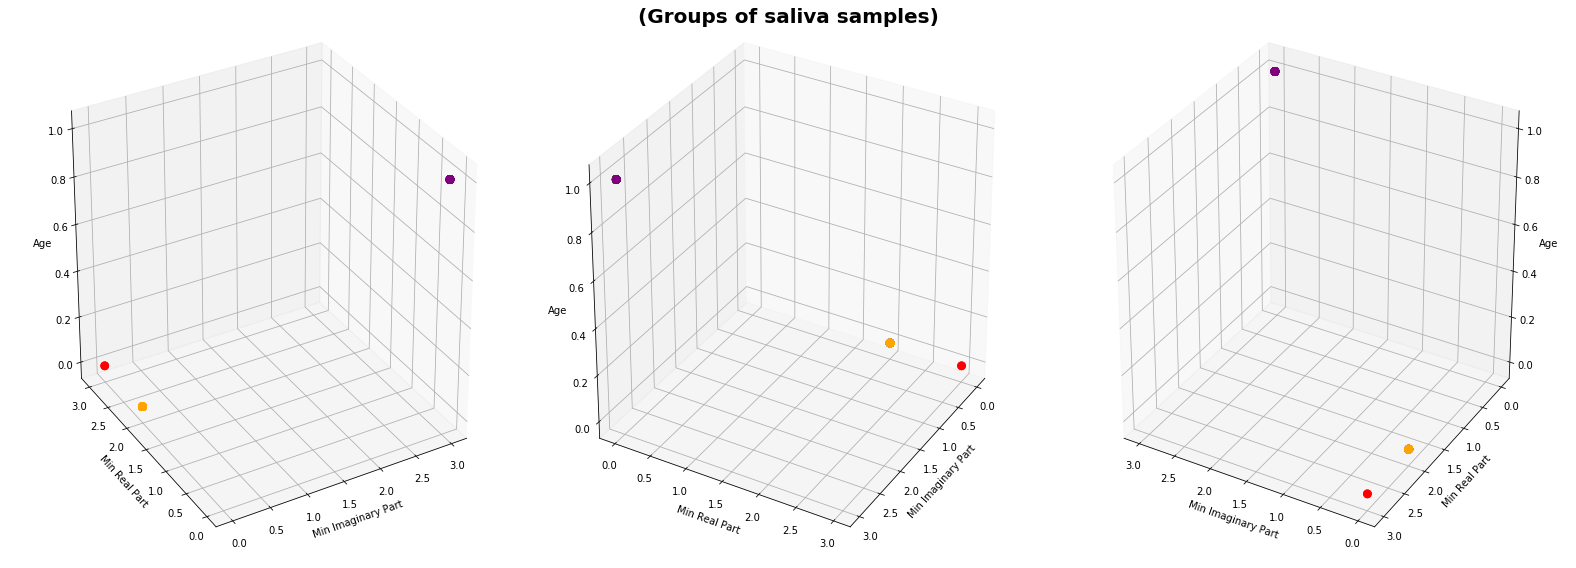

In [285]:
# Insert label into original data
X_dis['cluster'] = hc_cluster_dis

# Create figure
fig = plt.figure(figsize=(22,8))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Define colors
colors = ['blue', 'red', 'orange', 'green', 'purple', 'brown', 'pink' , 'gray' , 'olive','cyan','gold']

axes = [ax1, ax2, ax3]
for ax in axes:
    # Iterate thorough each cluster
    for c in set(hc_cluster):
        new_X_dis = X_dis[X_dis['cluster']==c]
        # plt.rcParams['axes.facecolor']='white
        #ax.scatter(new_X['MinIP'], new_X['AvgIP'], new_X['MinRP'], new_X['AvgRP'], new_X['Age'], new_X['Smoking'],c=colors[c], s=60)
        ax.scatter(new_X_dis['counting_trust'], new_X_dis['counting_untrust'],  new_X_dis['transaction_context'],c=colors[c], s=60)
        

ax1.view_init(elev=30, azim=-120)
ax2.view_init(elev=30, azim=30)
ax3.view_init(elev=30, azim=120)

ax1.set_xlabel('Min Imaginary Part')
ax1.set_ylabel('Min Real Part')
ax1.set_zlabel('Age')

ax2.set_xlabel('Min Imaginary Part')
ax2.set_ylabel('Min Real Part')
ax2.set_zlabel('Age')

ax3.set_xlabel('Min Imaginary Part')
ax3.set_ylabel('Min Real Part')
ax3.set_zlabel('Age')

fig.suptitle('(Groups of saliva samples)', fontsize=20, color='k', fontweight='bold')

fig.tight_layout()

### 2D Visualization

In [286]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8

In [287]:
df_dishonest.columns

Index(['counting_trust', 'counting_untrust', 'last_time',
       'transaction_context', 'trust_score', 'cluster'],
      dtype='object')

In [288]:
df_dishonest.shape

(322, 6)

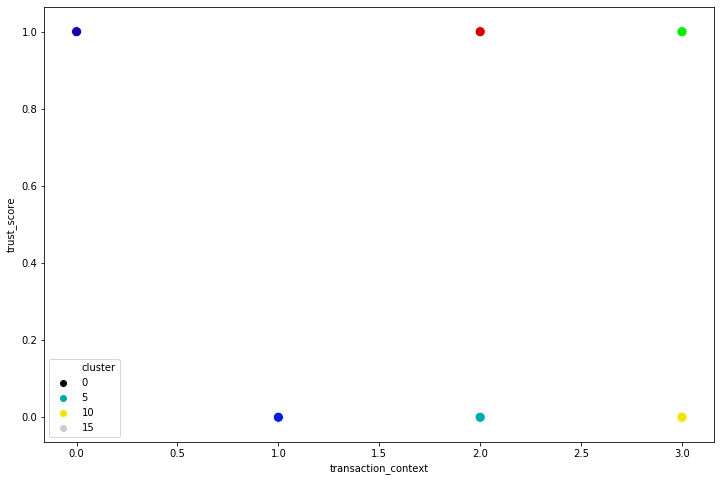

In [289]:
df_dishonest['cluster'] = hc_cluster_dis
sns.scatterplot(data=df_dishonest, x='transaction_context', y='trust_score', hue='cluster', palette=("nipy_spectral"), s=100)

## Results: Dishonest Internet Users Dataset

In [290]:
df_dishonest

,counting_trust,counting_untrust,last_time,transaction_context,trust_score,cluster
0,3,0,3,3,1,8
1,3,0,3,3,1,8
2,0,2,3,3,0,11
3,1,0,3,3,0,9
4,2,0,3,3,0,10
...,...,...,...,...,...,...
317,1,0,1,2,1,13
318,0,0,0,2,0,5
319,0,0,0,2,0,5
320,0,0,0,2,0,5


# AAAI 2013 Accepted Papers Dataset

## Data Exploration and Understanding

In [291]:
df_pap = pd.read_csv('dataset/papers.csv')
df_pap.head()

,Title,Keywords,Topics,High-Level Keyword(s),Abstract
0,The cascade auction – a mechanism for deterrin...,Mediators\nAuctions\nCollusion\nAd Exchanges,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems,We introduce a sealed bid auction of a single ...
1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Machine Learning\nReasoning under Uncertainty,This paper presents a new approach to basis ad...
2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory\nCoalition Structure G...,Coordination and Collaboration\nGame Theory,Multiagent Systems,Representation languages for coalitional game...
3,External Memory Best-First Search for Multiple...,External-Memory Search\nParallel Search\nMulti...,Heuristic Search\nEvaluation and Analysis (Sea...,Heuristic Search and Optimization,Multiple sequence alignment (MSA) is a central...
4,Posted Prices Exchange for Display Advertising...,Display Advertising\nDynamic Pricing\nMarket E...,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems,We propose a new market design for display adv...


In [292]:
df_pap.columns = [x.lower() for x in df_pap.columns]
df_pap.head()

,title,keywords,topics,high-level keyword(s),abstract
0,The cascade auction – a mechanism for deterrin...,Mediators\nAuctions\nCollusion\nAd Exchanges,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems,We introduce a sealed bid auction of a single ...
1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Machine Learning\nReasoning under Uncertainty,This paper presents a new approach to basis ad...
2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory\nCoalition Structure G...,Coordination and Collaboration\nGame Theory,Multiagent Systems,Representation languages for coalitional game...
3,External Memory Best-First Search for Multiple...,External-Memory Search\nParallel Search\nMulti...,Heuristic Search\nEvaluation and Analysis (Sea...,Heuristic Search and Optimization,Multiple sequence alignment (MSA) is a central...
4,Posted Prices Exchange for Display Advertising...,Display Advertising\nDynamic Pricing\nMarket E...,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems,We propose a new market design for display adv...


In [293]:
df_pap['title'].unique()

array(['The cascade auction – a mechanism for deterring collusion in auctions',
       'Basis Adaptation for Sparse Nonlinear Reinforcement Learning',
       'Optimal Coalition Structures in Cooperative Graph Games',
       'External Memory Best-First Search for Multiple Sequence Alignment',
       'Posted Prices Exchange for Display Advertising Contracts',
       'Gradient Networks for Shape-Based Object Instance Detection',
       'Unified Constraint Propagation on Multi-View Data',
       'Progression of Decomposed Situation Calculus Theories',
       'How to Cut a Cake Before the Party Ends',
       'Reciprocal Hash Tables for Nearest Neighbor Search',
       'Automated Workflow Synthesis',
       'Video Saliency Detection via Dynamic Consistent Spatio-Temporal Attention Modelling',
       'Symmetry-Aware Marginal Density Estimation',
       'Improving WalkSAT for Random $k$-Satisfiability Problem with $k>3$',
       'A Generalized Student-t Based Approach to Mixed-Type Anomaly Det

In [294]:
df_pap['keywords'].unique()

array(['Mediators\nAuctions\nCollusion\nAd Exchanges',
       'Reinforcement learning\nSparsity\nMirror descent\nOnline learning\nMarkov decision processes',
       "Cooperative Game Theory\nCoalition Structure Generation\nOptimal Coalition Structure\nDeng and Papadimitriou's Cooperative Graph Game\nPlanar Graphs\nMinor Free Graphs",
       'External-Memory Search\nParallel Search\nMultiple Sequence Alignment\nDynamic Programming',
       'Display Advertising\nDynamic Pricing\nMarket Equilibrium',
       'object detection\ninstance detection\nshape\ngradient networks',
       'pairwise constraint propagation\nsemi-supervised learning\nmulti-view data',
       'reasoning about actions\ndecomposition of logical theories\nsituation calculus\nbasic action theory\nprogression\nforgetting\ndecomposability\ninseparability',
       'Cake cutting\nFair division\nComputational social choice',
       'locality sensitive hashing\nnearest neighbor search\nhash table construction\nreciprocal hash ta

In [295]:
df_pap['high-level keyword(s)'].unique()

array(['Multiagent Systems',
       'Machine Learning\nReasoning under Uncertainty',
       'Heuristic Search and Optimization', 'Robotics',
       'Machine Learning', 'Knowledge Representation and Reasoning',
       'Heuristic Search and Optimization\nKnowledge-Based Systems\nMachine Learning',
       'Multiagent Systems\nApplications\nReasoning under Uncertainty',
       'Multidisciplinary Topics',
       'Constraints and Satisfiability\nHeuristic Search and Optimization',
       'Knowledge Representation and Reasoning\nReasoning under Uncertainty',
       'Multiagent Systems\nReasoning under Uncertainty',
       'Multiagent Systems\nApplications',
       'Constraints and Satisfiability\nHeuristic Search and Optimization\nKnowledge-Based Systems\nMachine Learning',
       'Reasoning under Uncertainty',
       'Multiagent Systems\nMultidisciplinary Topics',
       'Constraints and Satisfiability\nReasoning under Uncertainty',
       'Machine Learning\nMultiagent Systems',
       'Know

In [296]:
df_pap['topics'].unique()

array(['Auctions and Market-Based Systems\nE-Commerce\nGame Theory\nMechanism Design',
       'Dimension Reduction/Feature Selection\nOnline Learning\nReinforcement Learning\nSequential Decision Making',
       'Coordination and Collaboration\nGame Theory',
       'Heuristic Search\nEvaluation and Analysis (Search and Optimization)\nSearch (General/Other)',
       'Auctions and Market-Based Systems\nE-Commerce\nMechanism Design',
       'Vision, Object Recognition, and Perception',
       'Relational/Graph-Based Learning\nSemisupervised Learning',
       'Action, Change, and Causality',
       'Mechanism Design\nSocial Choice / Voting',
       'Search (General/Other)\nInformation Retrieval\nMachine Learning (General/other)',
       'Distributed Problem Solving\nComputational Social Science\nDecision/Utility Theory',
       'Cognitive Modeling',
       'Big Data / Scalability\nMachine Learning (General/other)\nProbabilistic Inference\nRelational Probabilistic Models',
       'SAT and CS

In [297]:
df_pap.drop('abstract',1,inplace=True)

## Data Preprocessing

### Split the High-Level Keyword(s) variable into seperated groups
This will be used for clustering

In [298]:
s_hlevelkey = df_pap['high-level keyword(s)'].str.split('\n').apply(pd.Series,1).stack()
s_hlevelkey

0    0                   Multiagent Systems
1    0                     Machine Learning
     1          Reasoning under Uncertainty
2    0                   Multiagent Systems
3    0    Heuristic Search and Optimization
                        ...                
148  1                             Robotics
149  0              Knowledge-Based Systems
     1                     Machine Learning
     2                         Applications
     3             Multidisciplinary Topics
Length: 249, dtype: object

In [299]:
s_hlevelkey.index = s_hlevelkey.index.droplevel(-1)
s_hlevelkey.name = 'high-level keyword(s)'
del df_pap['high-level keyword(s)']
df_pap = df_pap.join(s_hlevelkey).reset_index()

In [300]:
df_pap.head()

,index,title,keywords,topics,high-level keyword(s)
0,0,The cascade auction – a mechanism for deterrin...,Mediators\nAuctions\nCollusion\nAd Exchanges,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems
1,1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Machine Learning
2,1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Reasoning under Uncertainty
3,2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory\nCoalition Structure G...,Coordination and Collaboration\nGame Theory,Multiagent Systems
4,3,External Memory Best-First Search for Multiple...,External-Memory Search\nParallel Search\nMulti...,Heuristic Search\nEvaluation and Analysis (Sea...,Heuristic Search and Optimization


### Add flags depicting what group the paper belongs

In [301]:
df_pap['flags'] = pd.Series(np.ones(len(df_pap)),index=df_pap.index)
df_pap.head()

,index,title,keywords,topics,high-level keyword(s),flags
0,0,The cascade auction – a mechanism for deterrin...,Mediators\nAuctions\nCollusion\nAd Exchanges,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems,1.0
1,1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Machine Learning,1.0
2,1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Reasoning under Uncertainty,1.0
3,2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory\nCoalition Structure G...,Coordination and Collaboration\nGame Theory,Multiagent Systems,1.0
4,3,External Memory Best-First Search for Multiple...,External-Memory Search\nParallel Search\nMulti...,Heuristic Search\nEvaluation and Analysis (Sea...,Heuristic Search and Optimization,1.0


### Create dataframe of papers according to the groups

In [302]:
def matrix_from_df(papers):
    matrix = papers.pivot_table(index = ['title'], columns=['high-level keyword(s)'],values='flags')
    matrix = matrix.fillna(0).reset_index()
    x_cols = matrix.columns[1:]
    return matrix, x_cols

In [303]:
matrix, x_cols = matrix_from_df(df_pap)
matrix.head()

high-level keyword(s),title,Applications,Constraints and Satisfiability,Heuristic Search and Optimization,Knowledge Representation and Reasoning,Knowledge-Based Systems,Machine Learning,Multiagent Systems,Multidisciplinary Topics,Natural Language Processing,"Reasoning about Plans, Processes, and Actions",Reasoning under Uncertainty,Robotics
0,A Concave Conjugate Approach for Nonconvex Pen...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A Cyclic Weighted Median Method for L1 Low-Ran...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A Fast Pairwise Heuristic for Planning under U...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,A First-Order Formalization of Commitments and...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,A Framework for Aggregating Influenced CP-nets...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## K-Means Clustering

### Finding Optimal Number of Cluster

In [304]:
rcParams['figure.figsize'] = 8,6

D:\College\Anaconda\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (58) found smaller than n_clusters (59). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


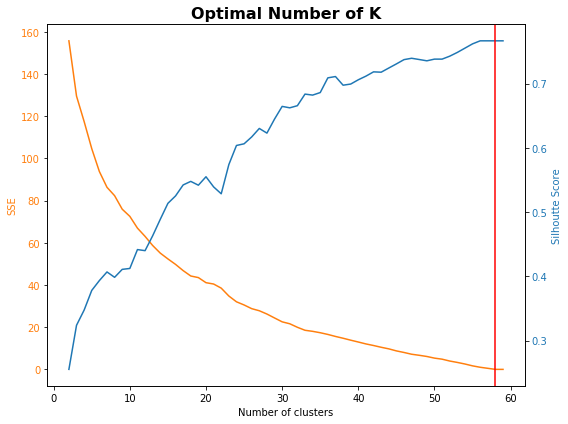

In [305]:
from sklearn.cluster import KMeans
from sklearn import metrics

X_pap = matrix[x_cols]

# Elbow Method
k_range = [i for i in range (2, 60)]
sse = []
silhouette = []
for k in k_range:
    kmeans_pap = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)
    km_cluster_pap = kmeans_pap.fit_predict(X_pap)
    km_silhouette_pap = metrics.silhouette_score(X_pap, km_cluster_pap)

    sse.append(kmeans_pap.inertia_)
    silhouette.append(km_silhouette_pap)

# Initialize plot
fig, ax1 = plt.subplots()

# Draw sse line
color1 = 'tab:orange'
ax1.set_title('Optimal Number of K', fontsize=16, fontweight='bold')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE', color=color1)
ax1.plot(k_range, sse, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

#  instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Draw silhouette score line
color2 = 'tab:blue'
ax2.set_ylabel('Silhoutte Score', color=color2)
ax2.plot(k_range, silhouette, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.axvline(x=58, color='red')

fig.tight_layout()
plt.show()

From the above plot we can see that k = 59 get the best SSE score while also having a pretty good silhouette score so we will use it to build our model.

### Build Model

In [306]:
from sklearn import metrics

# Fit K-Means Model to the Data
kmeans_pap = KMeans(n_clusters=58, init='k-means++', max_iter=500, n_init=10, random_state=0)
km_cluster_pap = kmeans_pap.fit_predict(X_pap)

# Evaluate model
km_silhouette_pap = metrics.silhouette_score(X_pap, km_cluster_pap)
print('Silhouette Score K-Means Clustering: {}'.format(km_silhouette_pap))

Silhouette Score K-Means Clustering: 0.7666666666666667


## Agglomerative Hierarchical Clustering

### Finding Optimal Number of Cluster

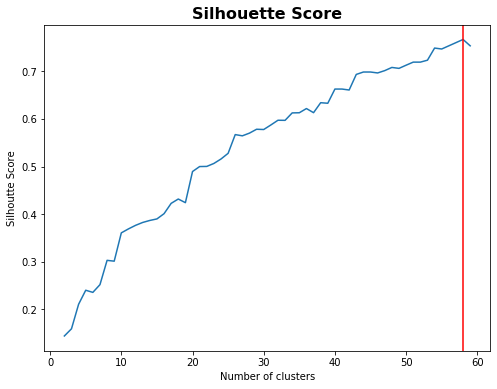

In [307]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

k_range = [i for i in range (2, 60)]
silhouette = []
for k in k_range:
    hc_pap = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    hc_cluster_pap = hc_pap.fit_predict(X_pap)
    hc_silhouette_pap = metrics.silhouette_score(X_pap, hc_cluster_pap)
    silhouette.append(hc_silhouette_pap)

# Visualize
plt.plot(k_range, silhouette)
plt.title('Silhouette Score', fontsize=16, fontweight='bold')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')

plt.axvline(x=58, color='red')
plt.show()

### Build Model

```K = 15``` as the optimal number of cluster with the Agglomerative Hierarchical algorithm, so let's build our model with 9 clusters.

In [308]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Fit the Hierarchical Clustering Model to the Dataset
hc_pap = AgglomerativeClustering(n_clusters=58, affinity='euclidean', linkage='ward')
hc_cluster_pap = hc_pap.fit_predict(X_pap)

# Evaluate model
hc_silhouette_pap = metrics.silhouette_score(X_pap, hc_cluster_pap)

In [309]:
print('Silhouette Score Agglomerative Clustering: {}'.format(hc_silhouette_pap))

Silhouette Score Agglomerative Clustering: 0.7666666666666667


## Paper: Model Comparison

In [310]:
dt_pap = {'Algoritma': ['Agglomerative Clustering', 'K-Means Clustering'], 'Silhouette Score': [hc_silhouette_pap, km_silhouette_pap]}

result = pd.DataFrame(data=dt_pap)
result

,Algoritma,Silhouette Score
0,Agglomerative Clustering,0.766667
1,K-Means Clustering,0.766667


Another same result for both methods. This time, we will take K-Means to visualize each clusters

## Visualize: K-Means Clustering

### 3D Visualization

In [311]:
X_pap.columns

Index(['Applications', 'Constraints and Satisfiability',
       'Heuristic Search and Optimization',
       'Knowledge Representation and Reasoning', 'Knowledge-Based Systems',
       'Machine Learning', 'Multiagent Systems', 'Multidisciplinary Topics',
       'Natural Language Processing',
       'Reasoning about Plans, Processes, and Actions',
       'Reasoning under Uncertainty', 'Robotics'],
      dtype='object', name='high-level keyword(s)')

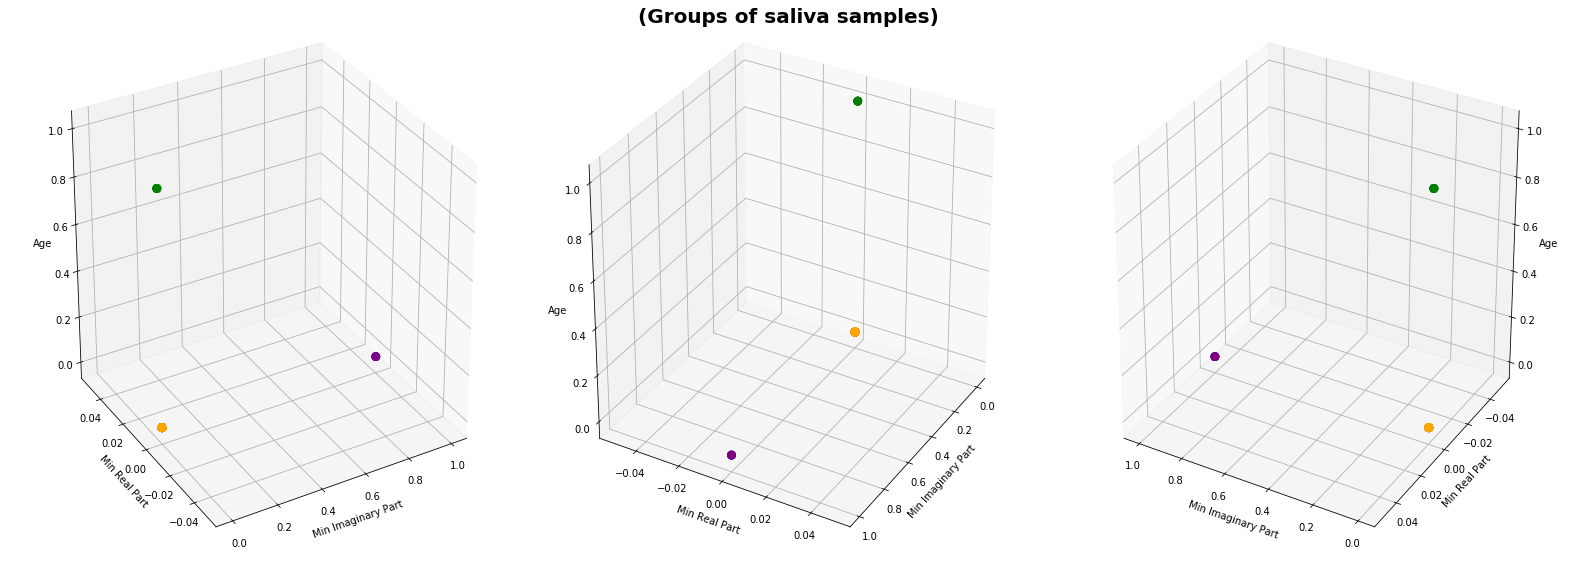

In [324]:
# Insert label into original data
X_pap['cluster'] = km_cluster_pap

# Create figure
fig = plt.figure(figsize=(22,8))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Define colors
colors = ['blue', 'red', 'orange', 'green', 'purple', 'brown', 'pink' , 'gray' , 'olive','cyan','gold']

axes = [ax1, ax2, ax3]
for ax in axes:
    # Iterate thorough each cluster
    for c in set(km_cluster):
        new_X_pap = X_pap[X_pap['cluster']==c]
        # plt.rcParams['axes.facecolor']='white
        #ax.scatter(new_X['MinIP'], new_X['AvgIP'], new_X['MinRP'], new_X['AvgRP'], new_X['Age'], new_X['Smoking'],c=colors[c], s=60)
        ax.scatter(new_X_pap['Knowledge Representation and Reasoning'], new_X_pap['Applications'],  new_X_pap['Natural Language Processing'],c=colors[c], s=60)
        

ax1.view_init(elev=30, azim=-120)
ax2.view_init(elev=30, azim=30)
ax3.view_init(elev=30, azim=120)

ax1.set_xlabel('Min Imaginary Part')
ax1.set_ylabel('Min Real Part')
ax1.set_zlabel('Age')

ax2.set_xlabel('Min Imaginary Part')
ax2.set_ylabel('Min Real Part')
ax2.set_zlabel('Age')

ax3.set_xlabel('Min Imaginary Part')
ax3.set_ylabel('Min Real Part')
ax3.set_zlabel('Age')

fig.suptitle('(Groups of saliva samples)', fontsize=20, color='k', fontweight='bold')

fig.tight_layout()

### 2D Visualization

In [325]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8

In [326]:
X_pap.columns

Index(['Applications', 'Constraints and Satisfiability',
       'Heuristic Search and Optimization',
       'Knowledge Representation and Reasoning', 'Knowledge-Based Systems',
       'Machine Learning', 'Multiagent Systems', 'Multidisciplinary Topics',
       'Natural Language Processing',
       'Reasoning about Plans, Processes, and Actions',
       'Reasoning under Uncertainty', 'Robotics', 'cluster'],
      dtype='object', name='high-level keyword(s)')

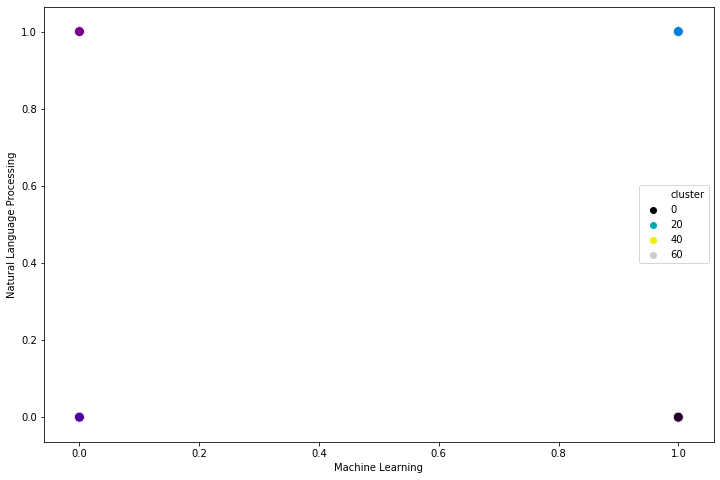

In [327]:
matrix['cluster'] = km_cluster_pap
sns.scatterplot(data=matrix, x='Machine Learning', y='Natural Language Processing', hue='cluster', palette=("nipy_spectral"), s=100)

## Results: Accepted Papers Dataset

In [328]:
matrix

high-level keyword(s),index,title,Applications,Constraints and Satisfiability,Heuristic Search and Optimization,Knowledge Representation and Reasoning,Knowledge-Based Systems,Machine Learning,Multiagent Systems,Multidisciplinary Topics,Natural Language Processing,"Reasoning about Plans, Processes, and Actions",Reasoning under Uncertainty,Robotics,cluster,x,y
0,0,A Concave Conjugate Approach for Nonconvex Pen...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6,-0.702988,0.024988
1,1,A Cyclic Weighted Median Method for L1 Low-Ran...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.662555,-0.183547
2,2,A Fast Pairwise Heuristic for Planning under U...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12,0.291251,0.363098
3,3,A First-Order Formalization of Commitments and...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,19,0.791562,-0.333990
4,4,A Framework for Aggregating Influenced CP-nets...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35,0.835926,-0.038740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,Vesselness Features and the Inverse Compositio...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,53,0.101132,0.205915
146,146,Video Saliency Detection via Dynamic Consisten...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36,0.166062,0.092457
147,147,Walking on Minimax Paths for k-NN Search,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.662555,-0.183547
148,148,When is Brute-Force Avoidable for CSP?,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.214117,0.440449


In [329]:
from sklearn.decomposition import PCA

In [330]:
#Using PCA to Transform Group-Related Features into Two Components
pca = PCA(n_components=2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()
paper_clusters = matrix[['title', 'cluster', 'x', 'y']]
paper_clusters.head()

high-level keyword(s),title,cluster,x,y
0,A Concave Conjugate Approach for Nonconvex Pen...,6,-0.702988,0.024988
1,A Cyclic Weighted Median Method for L1 Low-Ran...,1,-0.662555,-0.183547
2,A Fast Pairwise Heuristic for Planning under U...,12,0.291251,0.363098
3,A First-Order Formalization of Commitments and...,19,0.791562,-0.333990
4,A Framework for Aggregating Influenced CP-nets...,35,0.835926,-0.038740


In [331]:
#Merging Matrix into the Original Data Frame
paper_clusters.columns.name = None
df_pap_result = df_pap.merge(paper_clusters, on='title')
df_pap_result.head()

,index,title,keywords,topics,high-level keyword(s),flags,cluster,x,y
0,0,The cascade auction – a mechanism for deterrin...,Mediators\nAuctions\nCollusion\nAd Exchanges,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems,1.0,2,0.690333,-0.534875
1,1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Machine Learning,1.0,17,-0.628504,-0.164539
2,1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Reasoning under Uncertainty,1.0,17,-0.628504,-0.164539
3,2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory\nCoalition Structure G...,Coordination and Collaboration\nGame Theory,Multiagent Systems,1.0,2,0.690333,-0.534875
4,3,External Memory Best-First Search for Multiple...,External-Memory Search\nParallel Search\nMulti...,Heuristic Search\nEvaluation and Analysis (Sea...,Heuristic Search and Optimization,1.0,11,0.115539,0.351740


# Overall Results

In [332]:
dt_pap = {'Methods':['Agglomerative Clustering', 'K-Means Clustering'],'Exasens':[hc_silhouette, km_silhouette],'Dishonest': [hc_silhouette_dis, km_silhouette_dis], 'Papers': [hc_silhouette_pap, km_silhouette_pap]}

result = pd.DataFrame(data=dt_pap)
result

,Methods,Exasens,Dishonest,Papers
0,Agglomerative Clustering,0.783224,1.0,0.766667
1,K-Means Clustering,0.784371,1.0,0.766667


## Exasens Dataset

In [333]:
df_exasens

,diagnosis,min-imaginary-part,avg-imaginary-part,min-real-part,avg-real-part,gender,age,smoking,cluster
0,0,320.6100,300.563531,495.2600,464.171991,1.228590,1.524140,0.368550,2
1,0,325.3900,314.750360,473.7300,469.263140,-0.813941,1.254506,0.368550,0
2,0,323.0000,317.436056,476.1200,471.897667,1.228590,1.308433,1.717648,0
3,0,327.7800,317.399670,473.7300,468.856388,1.228590,1.470213,0.368550,0
4,0,325.3900,316.155785,478.5200,472.869783,-0.813941,0.877019,0.368550,0
...,...,...,...,...,...,...,...,...,...
394,3,314.9418,304.779677,473.0022,458.701666,-0.813941,0.014191,0.368550,1
395,3,314.9418,304.779677,473.0022,458.701666,-0.813941,-0.632929,-0.980547,1
396,3,314.9418,304.779677,473.0022,458.701666,-0.813941,-1.064343,-0.980547,1
397,3,314.9418,304.779677,473.0022,458.701666,1.228590,0.122045,-0.980547,1


## Dishonest Internet Users Dataset

In [334]:
df_dishonest

,counting_trust,counting_untrust,last_time,transaction_context,trust_score,cluster
0,3,0,3,3,1,8
1,3,0,3,3,1,8
2,0,2,3,3,0,11
3,1,0,3,3,0,9
4,2,0,3,3,0,10
...,...,...,...,...,...,...
317,1,0,1,2,1,13
318,0,0,0,2,0,5
319,0,0,0,2,0,5
320,0,0,0,2,0,5


## Accepted Papers Dataset

In [335]:
df_pap_result

,index,title,keywords,topics,high-level keyword(s),flags,cluster,x,y
0,0,The cascade auction – a mechanism for deterrin...,Mediators\nAuctions\nCollusion\nAd Exchanges,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems,1.0,2,0.690333,-0.534875
1,1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Machine Learning,1.0,17,-0.628504,-0.164539
2,1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Reasoning under Uncertainty,1.0,17,-0.628504,-0.164539
3,2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory\nCoalition Structure G...,Coordination and Collaboration\nGame Theory,Multiagent Systems,1.0,2,0.690333,-0.534875
4,3,External Memory Best-First Search for Multiple...,External-Memory Search\nParallel Search\nMulti...,Heuristic Search\nEvaluation and Analysis (Sea...,Heuristic Search and Optimization,1.0,11,0.115539,0.351740
...,...,...,...,...,...,...,...,...,...
244,148,Grounding Natural Language References to Unvis...,Human-robot interaction\nIntegrated perception...,Natural Language Processing (General/Other)\nR...,Robotics,1.0,40,0.116651,0.276975
245,149,Story Generation with Crowdsourced Plot Graphs,Story generation\nNarrative intelligence\nKnow...,Knowledge-Based Systems (General/Other)\nMachi...,Knowledge-Based Systems,1.0,47,-0.755368,-0.154737
246,149,Story Generation with Crowdsourced Plot Graphs,Story generation\nNarrative intelligence\nKnow...,Knowledge-Based Systems (General/Other)\nMachi...,Machine Learning,1.0,47,-0.755368,-0.154737
247,149,Story Generation with Crowdsourced Plot Graphs,Story generation\nNarrative intelligence\nKnow...,Knowledge-Based Systems (General/Other)\nMachi...,Applications,1.0,47,-0.755368,-0.154737
